In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import regressionplots
import statsmodels.formula.api as smf

In [5]:
toyota=pd.read_csv("ToyotaCorolla.csv") # read csv file
toyota.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0


In [6]:
 tyt=toyota.iloc[:,[2,3,6,8,12,13,15,16,17]] # including only features mentioned

In [7]:
tyt

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
tyt.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


SCATTER PLOT FOR ALL THE FEATURES TO FIND THE CORRELATION

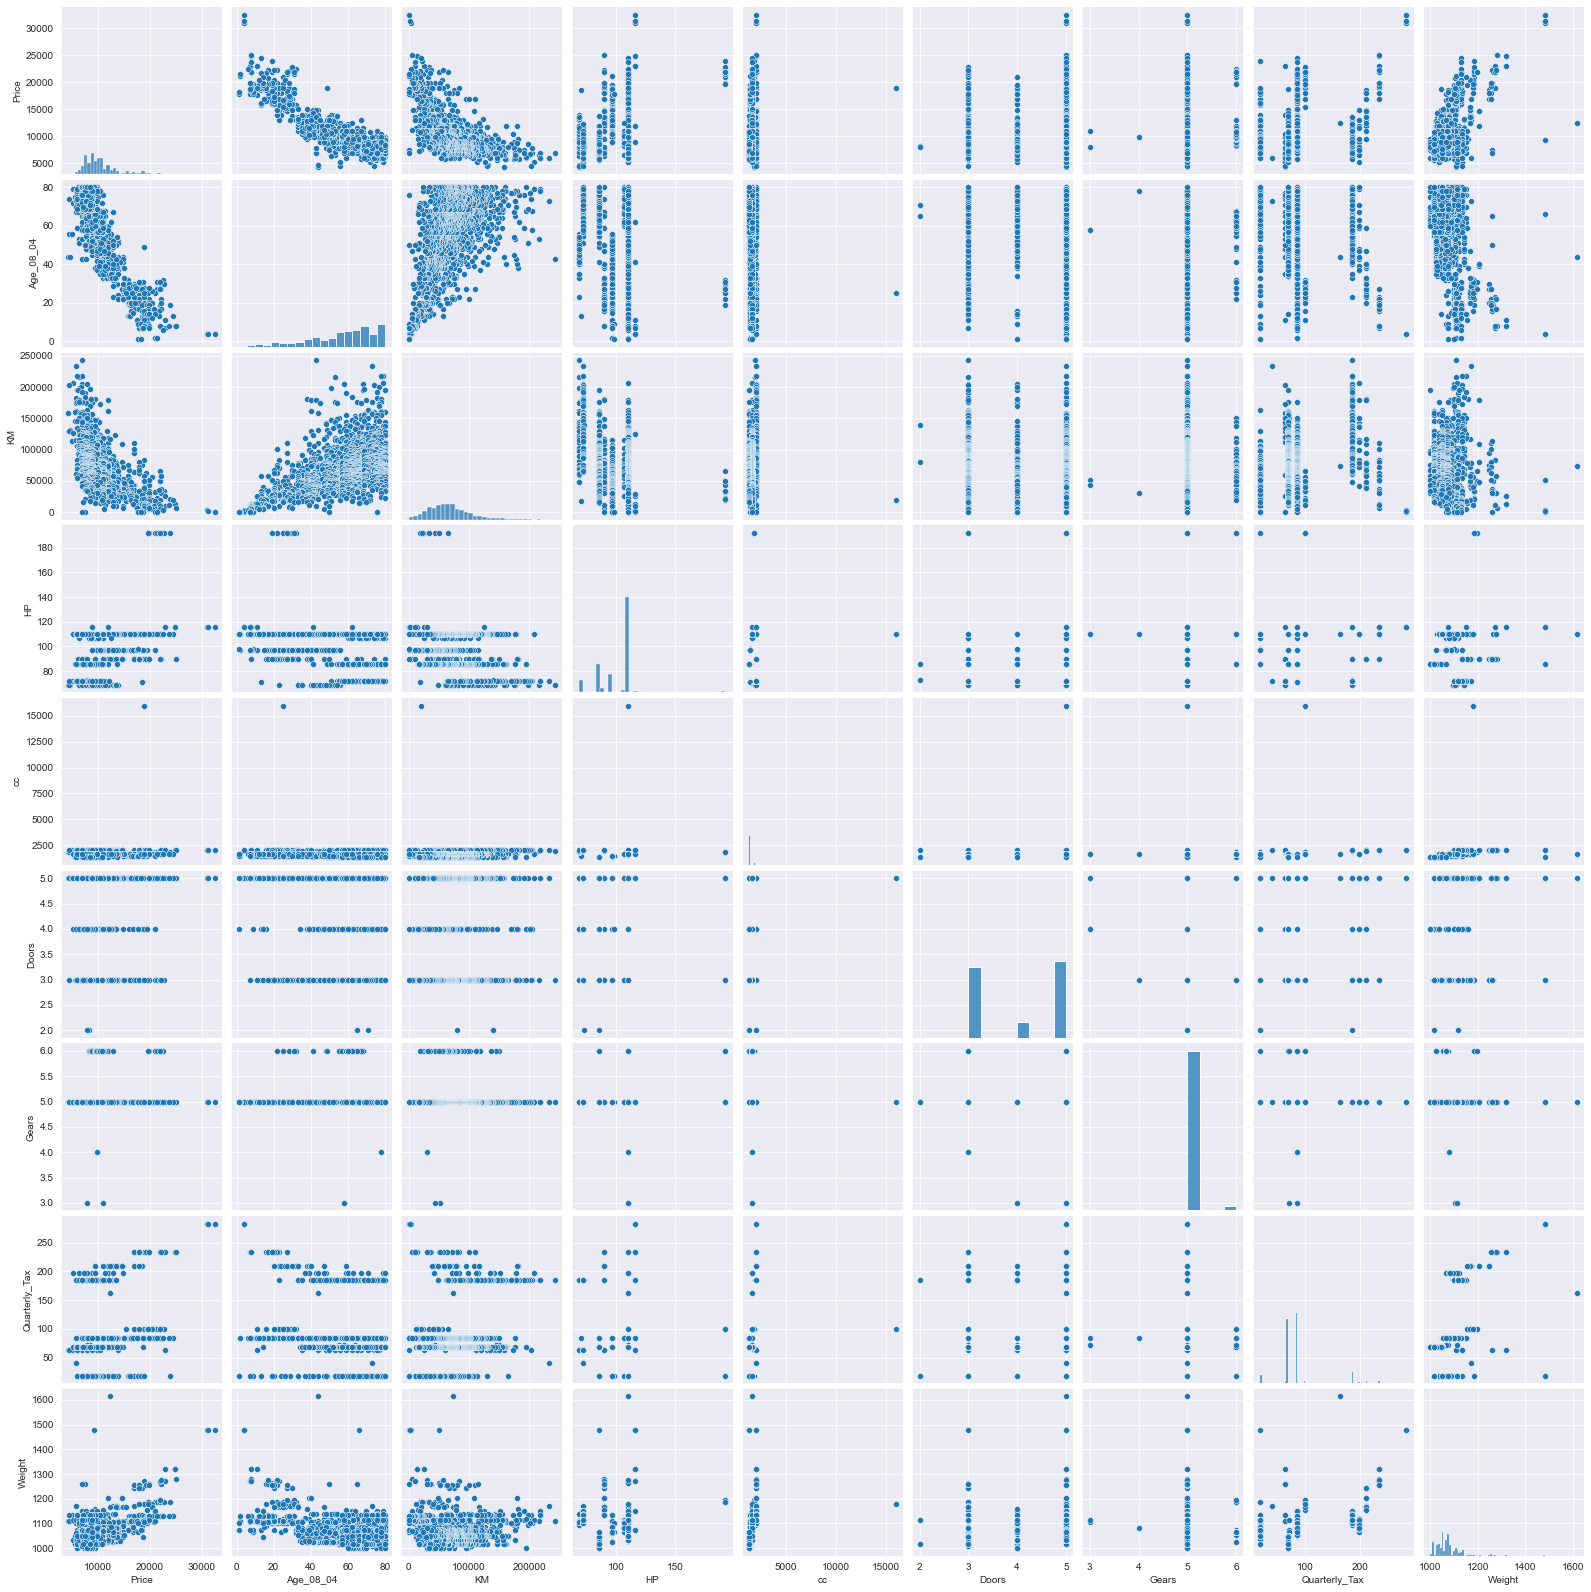

In [9]:
sns.set_style("darkgrid")
sns.pairplot(tyt)

PREPARING THE MODEL ::BUILD A MODEL

In [10]:
#build a model
model=smf.ols('Price~Age_08_04+KM+Weight+Quarterly_Tax+HP+KM+Doors+Gears+cc',data=tyt).fit()
#model.summary()
print(model.tvalues,'\n',model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
Weight           15.879803
Quarterly_Tax     3.014535
HP               11.241018
Doors            -0.040410
Gears             3.016007
cc               -1.344222
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
Weight            2.048576e-52
Quarterly_Tax     2.619148e-03
HP                3.757218e-28
Doors             9.677716e-01
Gears             2.606549e-03
cc                1.790902e-01
dtype: float64


BUILD LINEAR REGRESSION  MODEL  TO CHECK THE CORRELATION BETWEEN THEM

In [11]:
m_age=smf.ols('Price~Age_08_04',data=tyt).fit()
print(m_age.pvalues)
m_km=smf.ols('Price~KM',data=tyt).fit()
print(m_km.pvalues)
m_wt=smf.ols('Price~Weight',data=tyt).fit()
print(m_wt.pvalues)
m_tax=smf.ols('Price~Quarterly_Tax',data=tyt).fit()
print(m_tax.pvalues)
m_cc=smf.ols('Price~cc',data=tyt).fit()
print(m_cc.pvalues)
m_hp=smf.ols('Price~HP',data=tyt).fit()
print(m_hp.pvalues)
m_dr=smf.ols('Price~Doors',data=tyt).fit()
print(m_dr.pvalues)
m_gr=smf.ols('Price~Gears',data=tyt).fit()
print(m_gr.pvalues)

Intercept    0.0
Age_08_04    0.0
dtype: float64
Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64
Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64
Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64
Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64
Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64
Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64
Intercept    0.069804
Gears        0.016775
dtype: float64


CHECK FOR THE NORMALITY OF THE DATASET

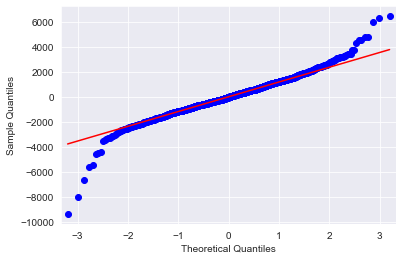

In [87]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.show()

TO CHECK FOR HOMOSCEDASTICITY

In [90]:
def get_standard_values(values):
    return (values-values.mean()/values.std())

Text(0, 0.5, 'Standardized residual values')

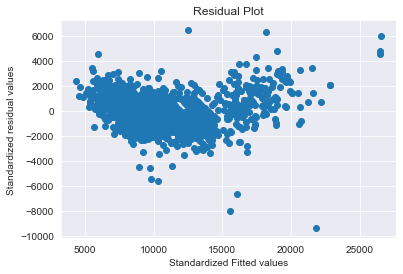

In [91]:
plt.scatter(get_standard_values(model.fittedvalues),
            get_standard_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [61]:
model=smf.ols('Price~Age_08_04+KM+Weight+Quarterly_Tax+HP+KM+Doors+Gears+cc',data=tyt).fit()
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

BY ANALAYSING THE RSQUARED AND PVALUES, WE ASSUME THAT ALL THE FEATURES  ARE SIGNIFICANT SO THE MODEL IS "model"

CHECK FOR THE INFLUENCE PLOTS

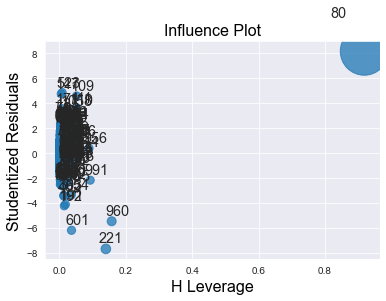

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [83]:
m1=tyt.copy()

DELETION OF THE HIGH INFLUENCE PLOTS AND COOKS DISTANCE

In [12]:
#cooksdistance #1
model1_influence=model.get_influence()
(c,_)=model1_influence.cooks_distance

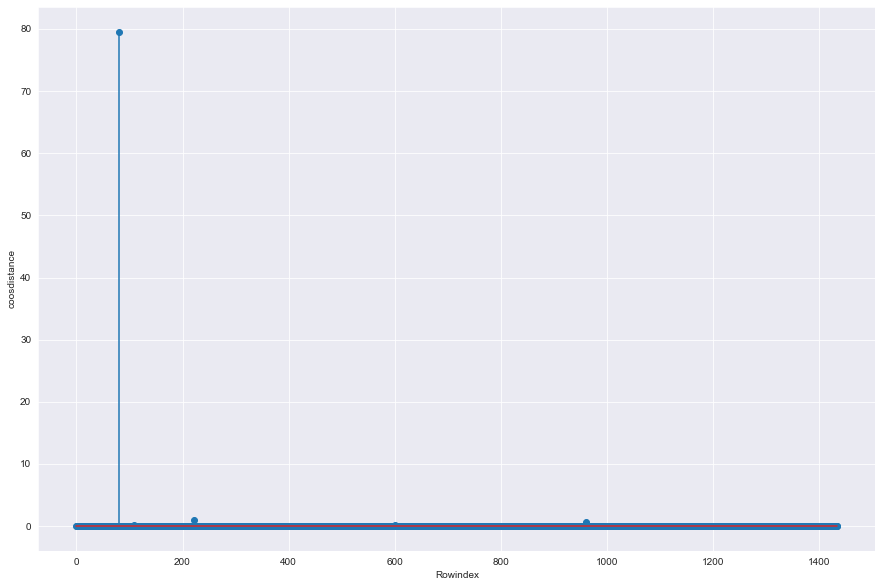

In [13]:
fig=plt.subplots(figsize=(15,10))
plt.stem(np.arange(len(tyt)),np.round(c,3))
plt.xlabel("Rowindex")
plt.ylabel("coosdistance")
plt.show()

In [14]:
(np.argmax(c),np.max(c))

(80, 79.52010624138128)

REBUILDING THE MODEL

In [15]:
tyt1=tyt.copy()

In [21]:
tyt2=tyt1.drop(tyt1.index[[80]],axis=0).reset_index()
tyt2=(tyt2.drop(['index'],axis=1))
tyt2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [29]:
#build the model excluding Weight and find rsquared and aic
model_wt=smf.ols('Price~Age_08_04+KM+Quarterly_Tax+HP+KM+Doors+Gears+cc',data=tyt2).fit()
(model_wt.rsquared,model_wt.aic)

(0.8394508024403655, 24981.322667036107)

In [30]:
#build the model excluding Quarterly_tax and find rsquared and aic
model_tax=smf.ols('Price~Age_08_04+KM+Weight+HP+KM+Doors+Gears+cc',data=tyt2).fit()
(model_tax.rsquared,model_tax.aic)

(0.8656883979875688, 24725.264231919595)

THE MODEL WITH HIGH RSQUARED AND LESS AIC VALUE IS SELECTED ("model_tax")

In [31]:
#cooks distance #2
model2_tax_influence=model_tax.get_influence()
(c_tax,_)=model2_tax_influence.cooks_distance

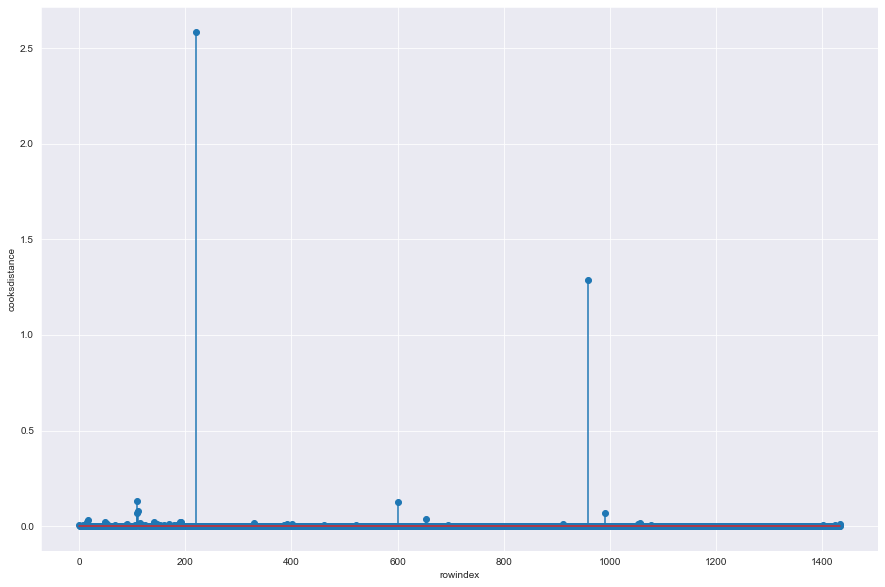

In [32]:
fig=plt.subplots(figsize=(15,10))
plt.stem(np.arange(len(tyt2)),np.round(c_tax,3))
plt.xlabel("rowindex")
plt.ylabel("cooksdistance")
plt.show()

In [40]:
(np.argmax(c_tax),np.max(c_tax))

(220, 2.585431186189687)

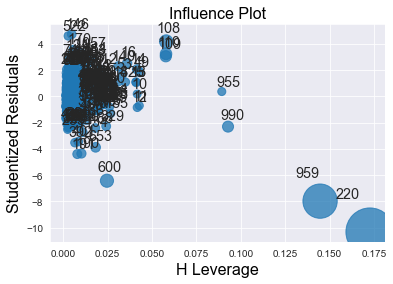

In [37]:
influence_plot(model_tax)
plt.show()

In [38]:
tyt3=tyt2.drop(tyt2.index[[220,959]],axis=0).reset_index()
tyt3=(tyt3.drop(['index'],axis=1))
tyt3.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


again performing diagonistic process and cooks distance # iter 3 

In [42]:
model_tax1=smf.ols('Price~Age_08_04+KM+Weight+HP+KM+Doors+Gears+cc',data=tyt3).fit()
(model_tax1.rsquared,model_tax1.aic)

(0.8840192903897235, 24482.18589185263)

In [43]:
# cooks distance #3
model3_tax=model_tax1.get_influence()
(c_tax3,_)=model3_tax.cooks_distance

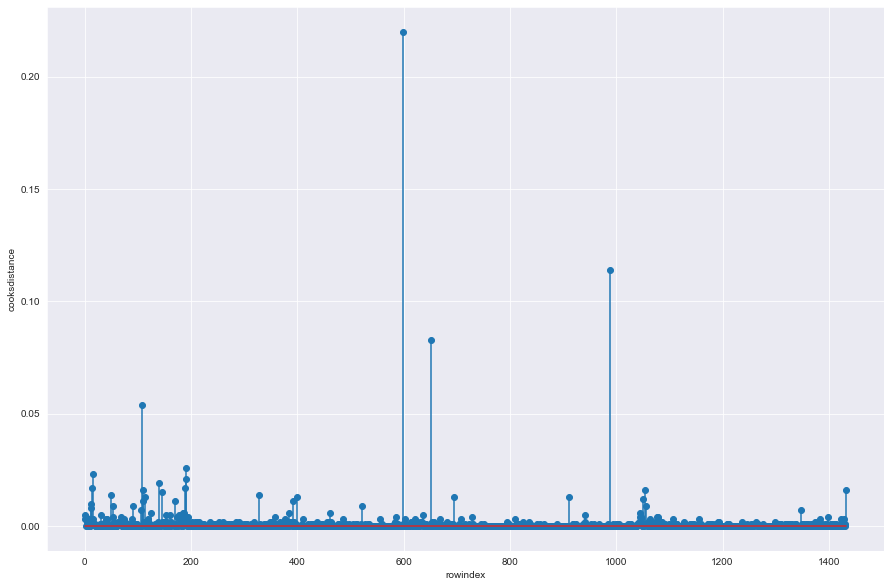

In [45]:
fig=plt.subplots(figsize=(15,10))
plt.stem(np.arange(len(tyt3)),np.round(c_tax3,3))
plt.xlabel("rowindex")
plt.ylabel("cooksdistance")
plt.show()

In [46]:
(np.argmax(c_tax3),np.max(c_tax3))

(599, 0.21998042709641452)

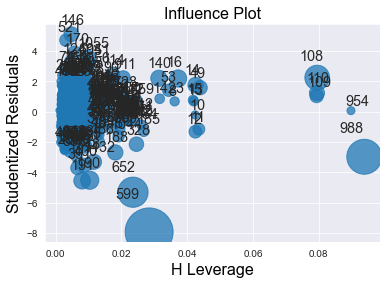

In [50]:
influence_plot(model_tax1)
plt.show()

In [51]:
tyt4=tyt3.drop(tyt3.index[[599,988]],axis=0).reset_index()
tyt4=(tyt4.drop(['index'],axis=1))
tyt4.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [52]:
model_tax2=smf.ols('Price~Age_08_04+KM+Weight+HP+KM+Doors+Gears+cc',data=tyt4).fit()
(model_tax2.rsquared,model_tax2.rsquared_adj)

(0.889558613220004, 0.8890153316265675)

In [62]:
(model_tax2.rsquared,model_tax2.aic)

(0.889558613220004, 24378.62619671402)

In [53]:
# cooks distance #4
model4_tax=model_tax2.get_influence()
(c_tax4,_)=model4_tax.cooks_distance

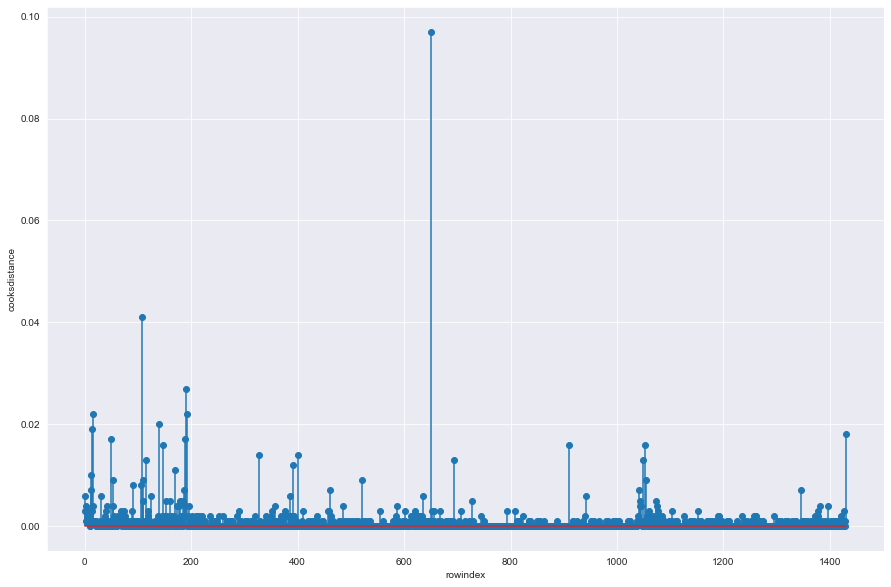

In [54]:
fig=plt.subplots(figsize=(15,10))
plt.stem(np.arange(len(tyt4)),np.round(c_tax4,3))
plt.xlabel("rowindex")
plt.ylabel("cooksdistance")
plt.show()

In [56]:
(np.argmax(c_tax4),np.max(c_tax4))

(651, 0.09668254020721605)

SINCE THE VALUE of n<1 LETS STOP THE DIAGNOSTIC PROCESS AND FINALIZE THE MODEL

In [63]:
model_tax2=smf.ols('Price~Age_08_04+KM+Weight+HP+KM+Doors+Gears+cc',data=tyt4).fit()
(model_tax2.rsquared,model_tax2.aic)

(0.889558613220004, 24378.62619671402)

In [64]:
(model_tax2.rsquared,model_tax2.rsquared_adj)

(0.889558613220004, 0.8890153316265675)